#Mounting Our Personal Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Cloning the YOLOv5 repository


In [ ]:
!git clone https://github.com/ultralytics/yolov5

#Installing Requirements

In [5]:
!pip install -r yolov5/requirements.txt

#Installing albumnetations

In [ ]:
!pip install -U albumentations


     |████████████████████████████████| 102 kB 14.9 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


#Install albumentations version 1.0.3 to use the augmentation scripts

In [ ]:
pip install albumentations==1.0.3

     |████████████████████████████████| 98 kB 6.4 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.1.0
    Uninstalling albumentations-1.1.0:
      Successfully uninstalled albumentations-1.1.0


#Uninstall opencv-python-headless and install opencv-python-headless<4.3

In [ ]:
!pip uninstall opencv-python-headless
!pip install "opencv-python-headless<4.3"

Found existing installation: opencv-python-headless 4.2.0.34
Uninstalling opencv-python-headless-4.2.0.34:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.2.0.34.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtCore-bbdab771.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtGui-903938cd.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtTest-1183da5d.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libavcodec-3cdd3bd4.so.58.62.100
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libavformat-69a63b50.so.58.35.100
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libavutil-8e8979a8.so.56.36.100
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libcrypto-a25ff511.so.1.1
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libswresample-c6b3bbb9.so.3.6.100
    /usr/local/lib/python3.7/

#Import cv2

In [ ]:
import cv2

#Intalling wandb to monitor our training in real-time

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 13.4 MB/s 
     |████████████████████████████████| 144 kB 48.5 MB/s 
     |████████████████████████████████| 181 kB 55.9 MB/s 
     |████████████████████████████████| 63 kB 2.6 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=14ad954ef988773a00221219ae4347add330b8451ff4e9212ca32b9408e5d3bb
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


#Creating Model architecture configuration file

Here we changing the ‘nc’ parameter to the no. of classes in our custom dataset.
This file also holds the value of pre-computed anchors (that help us to detect objects) along with the architecture of the backbone and neck of our model. Other parameters like the structure of layers, no of layers, values of hyperparameters, and filters are also defined in this file.

In [ ]:
with open('new_train_yaml', 'w+') as file:
    file.write(
        """
        # parameters
        nc: 3  # number of classes
        depth_multiple: 0.33  # model depth multiple
        width_multiple: 0.50  # layer channel multiple

        # anchors
        anchors:
          - [10,13, 16,30, 33,23]  # P3/8
          - [30,61, 62,45, 59,119]  # P4/16
          - [116,90, 156,198, 373,326]  # P5/32

        # YOLOv5 backbone
        backbone:
          # [from, number, module, args]
          [[-1, 1, Focus, [64, 3]],  # 0-P1/2
           [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
           [-1, 3, BottleneckCSP, [128]],
           [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
           [-1, 9, BottleneckCSP, [256]],
           [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
           [-1, 9, BottleneckCSP, [512]],
           [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
           [-1, 1, SPP, [1024, [5, 9, 13]]],
           [-1, 3, BottleneckCSP, [1024, False]],  # 9
          ]

        # YOLOv5 head
        head:
          [[-1, 1, Conv, [512, 1, 1]],
           [-1, 1, nn.Upsample, [None, 2, 'nearest']],
           [[-1, 6], 1, Concat, [1]],  # cat backbone P4
           [-1, 3, BottleneckCSP, [512, False]],  # 13

           [-1, 1, Conv, [256, 1, 1]],
           [-1, 1, nn.Upsample, [None, 2, 'nearest']],
           [[-1, 4], 1, Concat, [1]],  # cat backbone P3
           [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

           [-1, 1, Conv, [256, 3, 2]],
           [[-1, 14], 1, Concat, [1]],  # cat head P4
           [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

           [-1, 1, Conv, [512, 3, 2]],
           [[-1, 10], 1, Concat, [1]],  # cat head P5
           [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

           [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
          ]
        """
    )

#Creating training configuration file

Here defining the path of train and validation.Here  ‘nc’ represents the no. of classes and ‘names’ represents the class names associated with the class values (according to zero index).

In [ ]:
with open('new_data_yaml', 'w+') as file:
    file.write(
        """
        train: /content/drive/MyDrive/yolov5_faisal_1/images/train
        val: /content/drive/MyDrive/yolov5_faisal_1/images/valid

        nc: 3
        names: ['Visible change without cavitation','Visible change with microcavitation','Visible change with cavitation'
]
        """
    )

#Training Our Custom Object Detector Model

Here –data: /content/new_data_yaml
     –cfg: /content/new_train_yaml 
     –img: 416*416 size
     –batch:64
    –epochs: 400 epoches.Here pretrained model yolov5s have been used while training

In [ ]:
!python /content/yolov5/train.py --img 416 --batch 64 --epochs 400 --data /content/new_data_yaml --cfg /content/new_train_yaml  --weights yolov5s.pt

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 2
wandb: You chose 'Use an existing W&B account'
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
train: weights=yolov5s.pt, cfg=/content/new_train_yaml, data=/content/new_data_yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=400, batch_size=64, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=

#Accessing the Custom Model

In [ ]:
!ls /content/yolov5/runs/train

exp


In [ ]:
!ls /content/yolov5/runs/train/exp

confusion_matrix.png				   R_curve.png
events.out.tfevents.1651919552.48b3a660cfe1.527.0  results.csv
F1_curve.png					   results.png
hyp.yaml					   train_batch0.jpg
labels_correlogram.jpg				   train_batch1.jpg
labels.jpg					   train_batch2.jpg
opt.yaml					   val_batch0_labels.jpg
P_curve.png					   val_batch0_pred.jpg
PR_curve.png					   weights


#Weights Directory

In [2]:
!ls /content/yolov5/runs/train/exp/weights

best.pt  last.pt


#Zip the results file for save the model

In [ ]:
!zip -r /content/yolov5result.zip /content/yolov5

	zip warning: name not matched: /content/yolov5

zip error: Nothing to do! (try: zip -r /content/yolov5result.zip . -i /content/yolov5)


In [ ]:
from google.colab import files

In [ ]:
files.download('/content/yolov5result.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/wandb.zip /content/wandb

  adding: content/wandb/ (stored 0%)
  adding: content/wandb/run-20220507_103232-fj9zoz5n/ (stored 0%)
  adding: content/wandb/run-20220507_103232-fj9zoz5n/files/ (stored 0%)
  adding: content/wandb/run-20220507_103232-fj9zoz5n/files/wandb-metadata.json (deflated 53%)
  adding: content/wandb/run-20220507_103232-fj9zoz5n/files/config.yaml (deflated 70%)
  adding: content/wandb/run-20220507_103232-fj9zoz5n/files/output.log (deflated 91%)
  adding: content/wandb/run-20220507_103232-fj9zoz5n/files/requirements.txt (deflated 55%)
  adding: content/wandb/run-20220507_103232-fj9zoz5n/files/wandb-summary.json (deflated 71%)
  adding: content/wandb/run-20220507_103232-fj9zoz5n/files/media/ (stored 0%)
  adding: content/wandb/run-20220507_103232-fj9zoz5n/files/media/images/ (stored 0%)
  adding: content/wandb/run-20220507_103232-fj9zoz5n/files/media/images/BoundingBoxDebugger_79_983eef871fb2b19d7e31.png (deflated 0%)
  adding: content/wandb/run-20220507_103232-fj9zoz5n/files/media/images/Boundin

In [1]:
!unzip /content/yolov5result.zip

Archive:  /content/yolov5result.zip
   creating: content/yolov5/
   creating: content/yolov5/.git/
  inflating: content/yolov5/.git/config  
   creating: content/yolov5/.git/info/
  inflating: content/yolov5/.git/info/exclude  
   creating: content/yolov5/.git/refs/
   creating: content/yolov5/.git/refs/heads/
 extracting: content/yolov5/.git/refs/heads/master  
   creating: content/yolov5/.git/refs/tags/
   creating: content/yolov5/.git/refs/remotes/
   creating: content/yolov5/.git/refs/remotes/origin/
 extracting: content/yolov5/.git/refs/remotes/origin/HEAD  
  inflating: content/yolov5/.git/index  
   creating: content/yolov5/.git/logs/
   creating: content/yolov5/.git/logs/refs/
   creating: content/yolov5/.git/logs/refs/heads/
  inflating: content/yolov5/.git/logs/refs/heads/master  
   creating: content/yolov5/.git/logs/refs/remotes/
   creating: content/yolov5/.git/logs/refs/remotes/origin/
  inflating: content/yolov5/.git/logs/refs/remotes/origin/HEAD  
  inflating: content/y

In [ ]:
!unzip /content/wandb.zip

Archive:  /content/wandb.zip
   creating: content/wandb/
  inflating: content/wandb/debug-internal.log  
  inflating: content/wandb/debug.log  
   creating: content/wandb/run-20220429_064539-3q35bhly/
   creating: content/wandb/run-20220429_064539-3q35bhly/logs/
  inflating: content/wandb/run-20220429_064539-3q35bhly/logs/debug-internal.log  
  inflating: content/wandb/run-20220429_064539-3q35bhly/logs/debug.log  
  inflating: content/wandb/run-20220429_064539-3q35bhly/run-3q35bhly.wandb  
   creating: content/wandb/run-20220429_064539-3q35bhly/files/
  inflating: content/wandb/run-20220429_064539-3q35bhly/files/config.yaml  
  inflating: content/wandb/run-20220429_064539-3q35bhly/files/wandb-summary.json  
  inflating: content/wandb/run-20220429_064539-3q35bhly/files/output.log  
   creating: content/wandb/run-20220429_064539-3q35bhly/files/media/
   creating: content/wandb/run-20220429_064539-3q35bhly/files/media/images/
  inflating: content/wandb/run-20220429_064539-3q35bhly/files/m

In [ ]:
!ls /content/yolov5/runs/train

exp


In [ ]:
!ls /content/yolov5/runs/train/exp/weights

best.pt  last.pt


#At validation case for best weight

In [ ]:
!python /content/yolov5/val.py --img 416 --batch 16 --data /content/new_data_yaml --weights '/content/yolov5/runs/train/exp/weights/best.pt'

val: data=/content/new_data_yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=16, imgsz=416, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
new_train_yaml summary: 232 layers, 7251912 parameters, 0 gradients, 16.8 GFLOPs
val: Scanning '/content/drive/MyDrive/yolov5_faisal_1/labels/valid.cache' images and labels... 24 found, 0 missing, 6 empty, 0 corrupt: 100% 24/24 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 2/2 [00:02<00:00,  1.04s/it]
                 all         24         26        0.8      0.743      0.782      0.474
Visible change without cavitation         24         15      0.583      0.467   

# Inference using custom YOLOv5 object detector

In [6]:
!python /content/yolov5/detect.py --source testImage1.jpg --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 416 --conf 0.5 --save-txt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=testImage1.jpg, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
new_train_yaml summary: 232 layers, 7251912 parameters, 0 gradients, 16.8 GFLOPs
image 1/1 /content/testImage1.jpg: 416x416 1 Visible change without cavitation, Done. (0.025s)
Speed: 0.5ms pre-process, 24.7ms inference, 19.6ms NMS per image at shape (1, 3, 416, 416)
Results saved to yolov5/runs/detect/exp3
1 labels saved to yolov5/runs/detect/exp3/labels


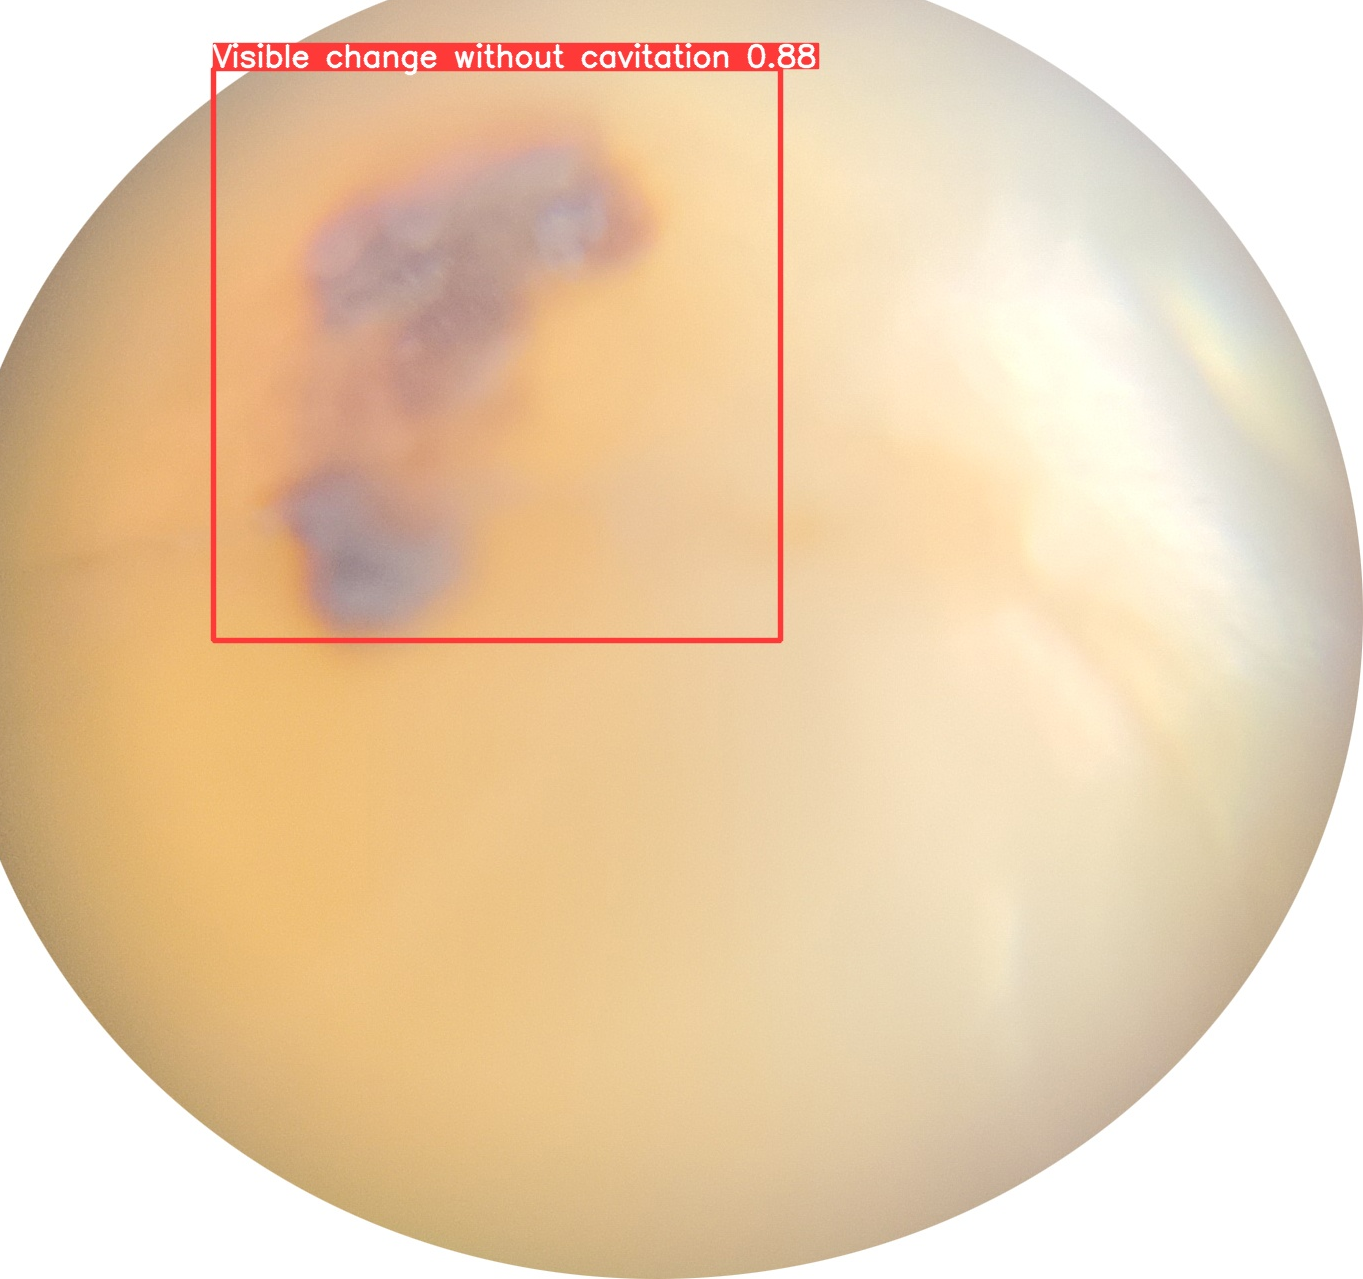

-1

In [17]:
# for google colab use cv2_imshow instead
# change x, y, h ,w to the values you are happy with
import cv2
from google.colab.patches import cv2_imshow
x=50
y=50
h=1700
w=1700
img = cv2.imread("/content/yolov5/runs/detect/exp3/testImage1.jpg")
crop_img = img[y:y+h, x:x+w]
cv2_imshow(crop_img)
cv2.waitKey(0)